### 1. Data Loading and Initial Exploration

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression,LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

In [42]:
import optuna

In [43]:
import datetime
import os

In [44]:
train_data = pd.read_csv('insurance-premium-forecasting-challenge/augmented_train (1).csv')
test_data = pd.read_csv('insurance-premium-forecasting-challenge/augmented_test.csv')

In [45]:
train_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Financial Index,Risk Profile,Income Stability,Credit Reliability,Regional Code,Policy Weekday
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,No,Weekly,House,2869.000000,37.454012,0.585854,9653.464185,290521.0,RC044,6
1,1,39.0,Female,316780.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,Yes,Monthly,House,1476.634221,95.071431,0.877287,293718.014356,481636.0,RC039,-1
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,Yes,Weekly,House,567.000000,73.199394,NaN,24813.980040,NaN,RC012,6
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,Yes,Daily,Apartment,765.000000,59.865848,-0.059436,144333.092133,134689.0,RC007,1
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,Yes,Weekly,House,2022.000000,15.601864,0.272688,40214.578097,357604.0,RC067,2


In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 27 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [47]:
train_data.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Financial Index,Risk Profile,Income Stability,Credit Reliability,Policy Weekday
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06,1.200000e+06,1.004659e+06,1.155051e+06,1.062118e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,4.683944e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,6.086953e+02,5.018219e+00,1.102617e+03,5.001486e+01,6.716818e+00,4.683419e+04,3.943000e+05,2.995203e+00
std,3.464103e+05,1.353995e+01,9.403841e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.542403e+02,2.594331e+00,8.650468e+02,2.885547e+01,6.244504e+01,9.416430e+04,1.852885e+05,2.162630e+00
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01,5.058923e-05,-3.541539e-01,1.024596e+00,9.000000e+04,-1.000000e+00
25%,2.999998e+05,3.000000e+01,8.805000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.800000e+02,3.000000e+00,5.140000e+02,2.501781e+01,4.563521e-01,8.637049e+03,2.304000e+05,1.000000e+00
50%,5.999995e+05,4.100000e+01,2.513500e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,6.160000e+02,5.000000e+00,8.720000e+02,5.001641e+01,1.049135e+00,2.509955e+04,3.794560e+05,3.000000e+00
75%,8.999992e+05,5.300000e+01,4.708800e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.420000e+02,7.000000e+00,1.509000e+03,7.499029e+01,2.943908e+00,4.789747e+04,5.505640e+05,5.000000e+00
max,1.199999e+06,6.400000e+01,1.000000e+06,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.500000e+02,9.000000e+00,5.000000e+03,9.999983e+01,1.677492e+04,1.164969e+06,7.225000e+05,7.000000e+00


In [48]:
train_data.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
Financial Index              0
Risk Profile            195341
Income Stability         44949
Credit Reliability      137882
Regional Code                0
Policy Weekday               0
dtype: int64

### 2. Data Cleaning

In [49]:
def preprocess_data(df):
    df_cleaned = df.copy()
        
    ## Converting date columns to datetime
    df_cleaned['Policy Start Date'] = pd.to_datetime(df_cleaned['Policy Start Date'])
    ## separate date into year, month, day
    df_cleaned['Policy_Start_Year'] = df_cleaned['Policy Start Date'].dt.year
    df_cleaned['Policy_Start_Month'] = df_cleaned['Policy Start Date'].dt.month
    df_cleaned['Policy_Start_Day'] = df_cleaned['Policy Start Date'].dt.day

    df_cleaned.drop('Policy Start Date', axis=1, inplace=True)
        
    ## fill missing values in categorical columns with the most frequent value
    categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])
        
    ## Handle numerical missing values
    numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        ## Fill with median for numerical columns
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())
        
    return df_cleaned

In [50]:
train_cleaned = preprocess_data(train_data)
test_cleaned = preprocess_data(test_data)

### 3. Exploratory Data Analysis (EDA)

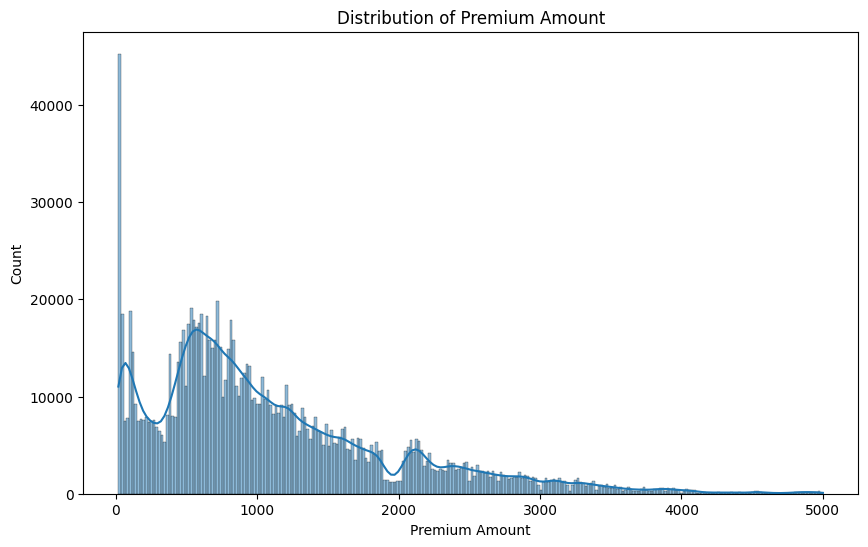

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(train_cleaned['Premium Amount'], kde=True)
plt.title('Distribution of Premium Amount')
plt.show()

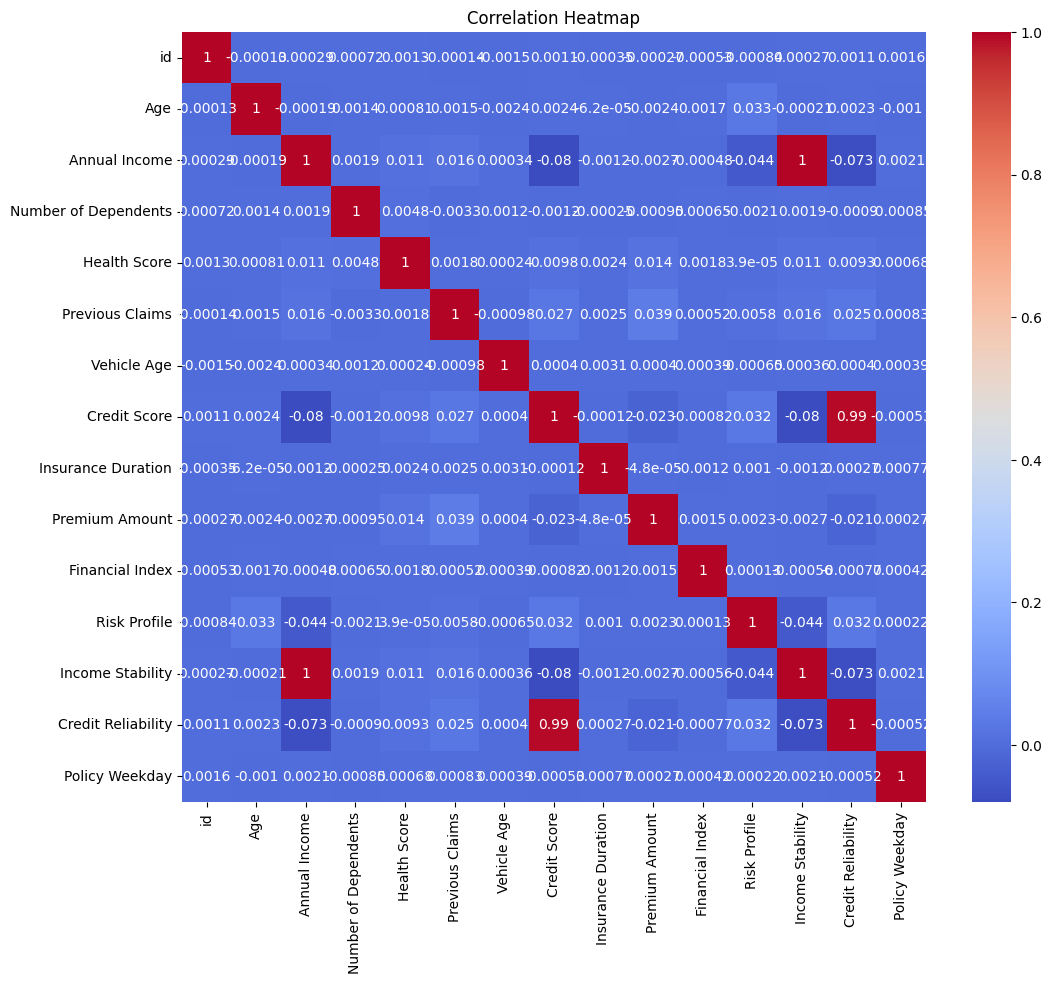

In [15]:
numerical_features = train_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation = train_cleaned[numerical_features].corr()['Premium Amount']
plt.figure(figsize=(12, 10))
sns.heatmap(train_cleaned[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

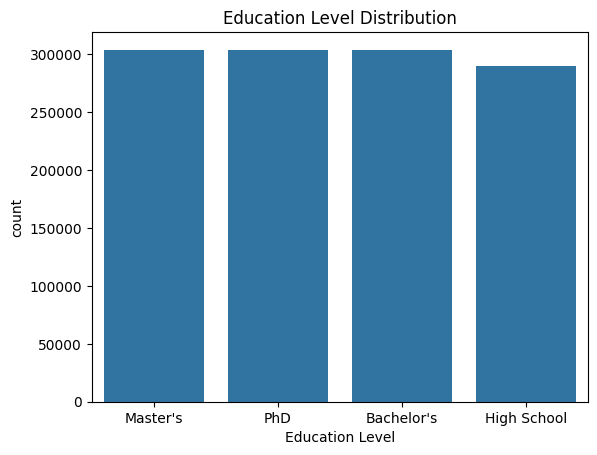

In [22]:
sns.countplot(data = train_cleaned, x = 'Education Level', order = train_cleaned['Education Level'].value_counts().index)
plt.title('Education Level Distribution')
plt.show()

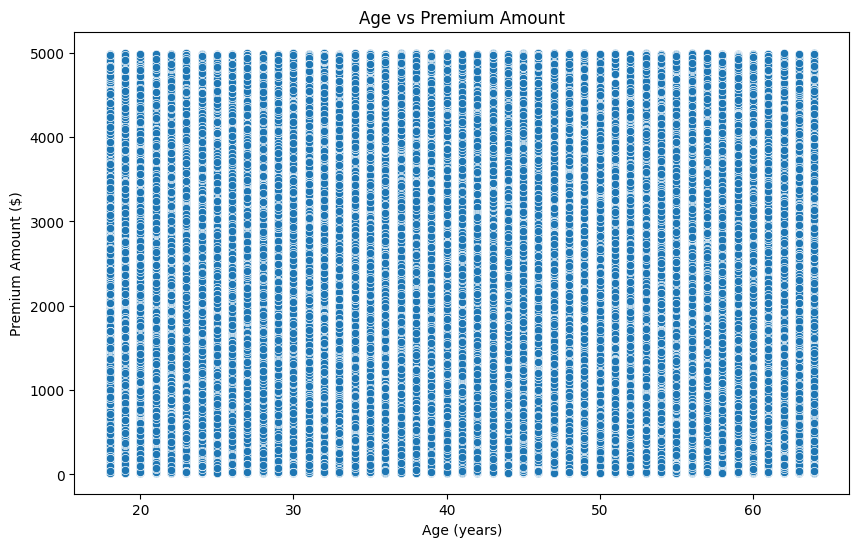

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Premium Amount', data=train_data)
plt.title('Age vs Premium Amount')
plt.xlabel('Age (years)')
plt.ylabel('Premium Amount ($)')
plt.show()

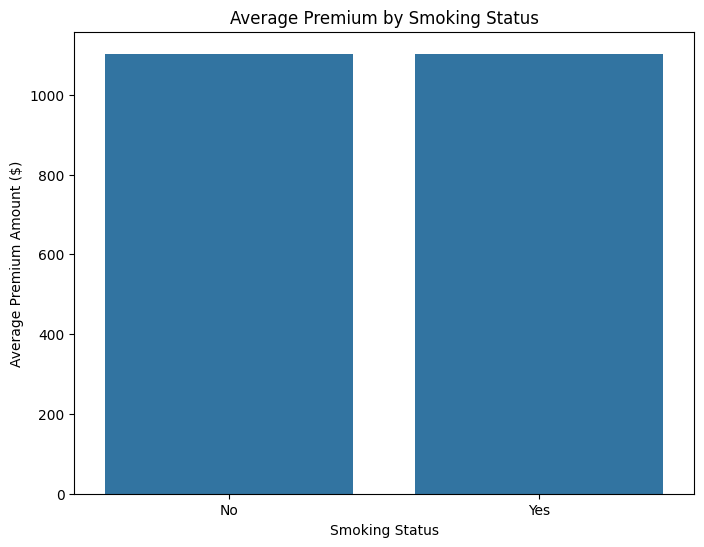

In [84]:
smoking_avg = train_data.groupby('Smoking Status')['Premium Amount'].mean().reset_index()
        
plt.figure(figsize=(8, 6))
sns.barplot(x='Smoking Status', y='Premium Amount', data=smoking_avg)
plt.title('Average Premium by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Average Premium Amount ($)')
plt.show()

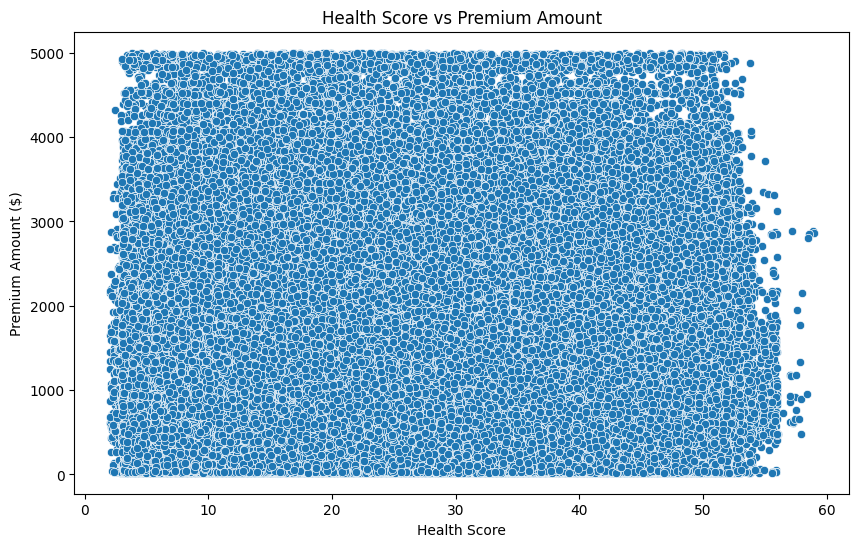

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Health Score', y='Premium Amount', data=train_data)
plt.title('Health Score vs Premium Amount')
plt.xlabel('Health Score')
plt.ylabel('Premium Amount ($)')
plt.show()

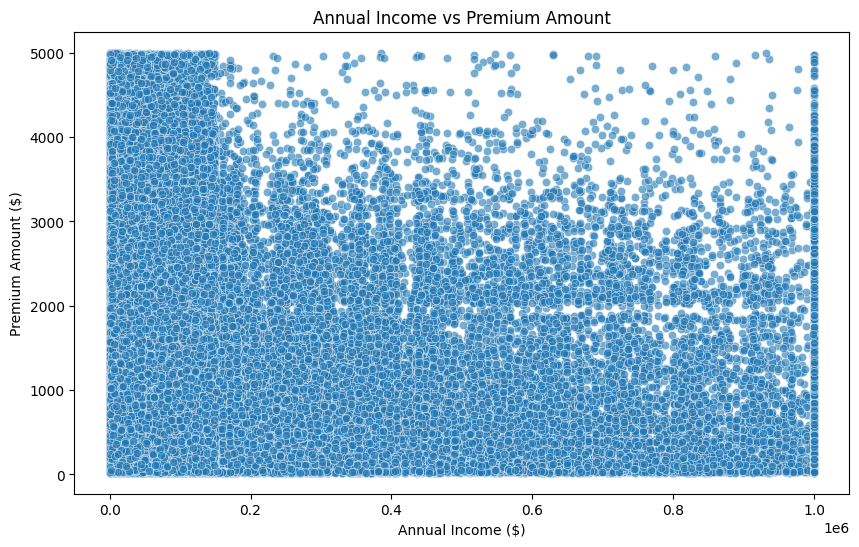

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Premium Amount', data=train_data)
plt.title('Annual Income vs Premium Amount')
plt.xlabel('Annual Income ($)')
plt.ylabel('Premium Amount ($)')
plt.show()

### 4. Feature Engineering

In [51]:
X_train = train_cleaned.drop(['Premium Amount', 'id',], axis=1)
y_train = np.log1p(train_cleaned['Premium Amount'])

In [52]:
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [53]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

In [54]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [55]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [56]:
X_train_preprocessed = preprocessor.fit_transform(X_train_split)
X_val_preprocessed = preprocessor.transform(X_val)

### 5. Model Selection

In [69]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'CatBoost': cb.CatBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [70]:
def rmsle(y_true, y_pred):
    ## convert negative values to zero
    y_true = np.maximum(y_true, 0)
    y_pred = np.maximum(y_pred, 0)
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

In [72]:
model_results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_preprocessed, y_train_split)

    y_val_pred = model.predict(X_val_preprocessed)

    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)
    rmsle_score = rmsle(y_val, y_val_pred)

    model_results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'RMSLE': rmsle_score
    }
    print(f"  RMSLE: {rmsle_score:.4f}")
    print(f"  R²: {r2:.4f}")


Training Linear Regression...
  RMSLE: 0.1653
  R²: 0.0053

Training Ridge Regression...
  RMSLE: 0.1653
  R²: 0.0053

Training Lasso Regression...
  RMSLE: 0.1657
  R²: -0.0000

Training ElasticNet...
  RMSLE: 0.1657
  R²: 0.0000

Training Gradient Boosting...
  RMSLE: 0.1614
  R²: 0.0528

Training XGBoost...
  RMSLE: 0.1606
  R²: 0.0629

Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 960000, number of used features: 143
[LightGBM] [Info] Start training from score 6.593915


c:\Users\vansh\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


  RMSLE: 0.1605
  R²: 0.0641

Training CatBoost...
0:	learn: 1.0925541	total: 45.3ms	remaining: 4.48s
1:	learn: 1.0896937	total: 166ms	remaining: 8.15s
2:	learn: 1.0873478	total: 228ms	remaining: 7.37s
3:	learn: 1.0849564	total: 333ms	remaining: 7.99s
4:	learn: 1.0834553	total: 383ms	remaining: 7.27s
5:	learn: 1.0817724	total: 488ms	remaining: 7.64s
6:	learn: 1.0805458	total: 632ms	remaining: 8.39s
7:	learn: 1.0793874	total: 707ms	remaining: 8.13s
8:	learn: 1.0786299	total: 810ms	remaining: 8.19s
9:	learn: 1.0777223	total: 905ms	remaining: 8.14s
10:	learn: 1.0762790	total: 969ms	remaining: 7.84s
11:	learn: 1.0756824	total: 1.07s	remaining: 7.84s
12:	learn: 1.0752766	total: 1.15s	remaining: 7.72s
13:	learn: 1.0745104	total: 1.22s	remaining: 7.51s
14:	learn: 1.0740909	total: 1.26s	remaining: 7.15s
15:	learn: 1.0729872	total: 1.31s	remaining: 6.88s
16:	learn: 1.0723365	total: 1.37s	remaining: 6.71s
17:	learn: 1.0720246	total: 1.49s	remaining: 6.77s
18:	learn: 1.0711451	total: 1.59s	remain

In [73]:
sorted_models = sorted(model_results.items(), key=lambda x: x[1]['RMSLE'])

best_model_name = sorted_models[0][0]
best_model_metrics = sorted_models[0][1]

In [75]:
print(best_model_metrics)
print(best_model_name)

{'MSE': 1.1257290120738455, 'RMSE': 1.0610037757113995, 'MAE': 0.7555740031899812, 'R²': 0.06405843275194245, 'RMSLE': 0.16049377628392558}
LightGBM


from this we can tell that all three Gradient Boosting methods:- XGBoost, LightGBM and CatBoost are the best models

tried using hyperparameter for LightGBM and CatBoost, but it didn't improve the results.

### hyperparameter tuning for catboost model

In [ ]:
def objective_catboost(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 300),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 0.0, 1.0),
        'random_seed': 42,
        'verbose': False
    }

    model = cb.CatBoostRegressor(**params)

    # Use k-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmsle_scores = []

    for train_idx, val_idx in kf.split(X_train_preprocessed):
        X_fold_train, X_fold_val = X_train_preprocessed[train_idx], X_train_preprocessed[val_idx]
        y_fold_train, y_fold_val = y_train_split.iloc[train_idx], y_train_split.iloc[val_idx]

        model.fit(
            X_fold_train, y_fold_train,
            eval_set=[(X_fold_val, y_fold_val)]
        )

        y_fold_pred = model.predict(X_fold_val)

        fold_rmsle = rmsle(y_fold_val, y_fold_pred)
        rmsle_scores.append(fold_rmsle)

    return np.mean(rmsle_scores)

In [ ]:
print("\nOptimizing CatBoost hyperparameters...")
study_cb = optuna.create_study(direction='minimize')
study_cb.optimize(objective_catboost, n_trials=20)  

# Get the best hyperparameters
best_cb_params = study_cb.best_params
print(f"Best CatBoost parameters: {best_cb_params}")
print(f"Best RMSLE: {study_cb.best_value:.4f}")

[I 2025-04-18 14:58:42,794] A new study created in memory with name: no-name-5894a35a-8cd9-423c-8d20-0db8a4fd0e83



Optimizing CatBoost hyperparameters...


[I 2025-04-18 14:59:45,805] Trial 0 finished with value: 0.16058461983780545 and parameters: {'iterations': 166, 'depth': 9, 'learning_rate': 0.02557794458623764, 'l2_leaf_reg': 6.422659327856788, 'border_count': 223, 'bagging_temperature': 0.8294421670643743, 'random_strength': 0.3015890934247907}. Best is trial 0 with value: 0.16058461983780545.
[I 2025-04-18 15:00:38,596] Trial 1 finished with value: 0.16055952682949662 and parameters: {'iterations': 274, 'depth': 4, 'learning_rate': 0.2608892746237654, 'l2_leaf_reg': 6.790135144243372, 'border_count': 135, 'bagging_temperature': 0.5621108956298619, 'random_strength': 0.07097807421967206}. Best is trial 1 with value: 0.16055952682949662.
[I 2025-04-18 15:01:52,459] Trial 2 finished with value: 0.160652184759447 and parameters: {'iterations': 272, 'depth': 7, 'learning_rate': 0.03540459350385513, 'l2_leaf_reg': 2.000723379163781, 'border_count': 85, 'bagging_temperature': 0.6713122028561627, 'random_strength': 0.7908182906687138}. Be

Best CatBoost parameters: {'iterations': 142, 'depth': 8, 'learning_rate': 0.19906471393161804, 'l2_leaf_reg': 8.565193652415438, 'border_count': 209, 'bagging_temperature': 0.20356165332466442, 'random_strength': 0.17794883581098575}
Best RMSLE: 0.1604


In [63]:
best_cb_params

{'iterations': 142,
 'depth': 8,
 'learning_rate': 0.19906471393161804,
 'l2_leaf_reg': 8.565193652415438,
 'border_count': 209,
 'bagging_temperature': 0.20356165332466442,
 'random_strength': 0.17794883581098575}

In [65]:
model = cb.CatBoostRegressor(**best_cb_params)
model.fit(X_train_preprocessed, y_train_split)
y_val_pred = model.predict(X_val_preprocessed)

print(f"RMSLE: {rmsle(y_val, y_val_pred):.4f}")

0:	learn: 1.0884916	total: 86.6ms	remaining: 12.2s
1:	learn: 1.0815353	total: 172ms	remaining: 12s
2:	learn: 1.0774961	total: 241ms	remaining: 11.2s
3:	learn: 1.0739703	total: 312ms	remaining: 10.8s
4:	learn: 1.0715195	total: 409ms	remaining: 11.2s
5:	learn: 1.0699829	total: 504ms	remaining: 11.4s
6:	learn: 1.0690321	total: 608ms	remaining: 11.7s
7:	learn: 1.0683060	total: 707ms	remaining: 11.8s
8:	learn: 1.0667148	total: 793ms	remaining: 11.7s
9:	learn: 1.0657125	total: 897ms	remaining: 11.8s
10:	learn: 1.0649529	total: 959ms	remaining: 11.4s
11:	learn: 1.0642435	total: 1.02s	remaining: 11.1s
12:	learn: 1.0638533	total: 1.13s	remaining: 11.2s
13:	learn: 1.0635037	total: 1.25s	remaining: 11.4s
14:	learn: 1.0630744	total: 1.33s	remaining: 11.3s
15:	learn: 1.0628457	total: 1.42s	remaining: 11.2s
16:	learn: 1.0624935	total: 1.49s	remaining: 11s
17:	learn: 1.0623302	total: 1.6s	remaining: 11s
18:	learn: 1.0621639	total: 1.71s	remaining: 11.1s
19:	learn: 1.0620529	total: 1.81s	remaining: 11

In [ ]:
X_test = test_cleaned.drop(['id'], axis=1)
X_test_preprocessed = preprocessor.transform(X_test)

test_predictions = np.expm1(model.predict(X_test_preprocessed))

submission = pd.DataFrame({
    'id': test_data['id'],
    'Premium Amount': test_predictions
})
submission.to_csv('premium_predictions_cb.csv', index=False)
print("\nTest predictions saved to 'premium_predictions_cb.csv'")


Test predictions saved to 'premium_predictions_cb2.csv'


### the score (error) in the tezt data is 1.07060